# Exercises

### <font color=red>The motion corrected video must be placed at *data/motion_corrected/motion_corrected_video_d1_300_d2_400_d3_1_order_C_frames_500.mmap* for this code to work.</font>

## Exercise 1: Image characteristics
---

**A.** Distiguishing pixels   

Fluctuations in the activitation of the neuron can be directly observed on the video or in a temporal trace plot. Plotting the temporal trace will allow us to see the calcium transient dinamic, if a pixel belonging to a neuron is selected. 

* Select a set of *N* random pixels from the ROI and plot the temporal evolution of pixel value. If the random pixels are choosen from an active neuron, you will be able to see the calcium transcient dynamic. 

**B.** Temporal statistics
 * For the selected pixels, plot the histogram of pixel value. What are the difference in different regions?, and how can that help to differ a neuron from the background?

* If we can already see the calcium traces from the row data, why do we need to do a segmentation of the neurons? Why, as a starter, would not be a good idea to work directly with the temporal traces? 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# CaImAn funtions and objects
import caiman as cm

import seaborn as sns
sns.set_theme(context='notebook',style='white',font_scale=1.5)

In [2]:
# load motion corrected video
input_mmap_file_path = 'data/motion_corrected/motion_corrected_video_d1_300_d2_400_d3_1_order_C_frames_500.mmap'
Yr, dims, T = cm.load_memmap(input_mmap_file_path)         # load mmap file
images = Yr.T.reshape((T,) + dims, order='F' )

Decode mmap filename data/motion_corrected/motion_corrected_video_d1_300_d2_400_d3_1_order_C_frames_500.mmap


Text(0, 0.5, 'activity')

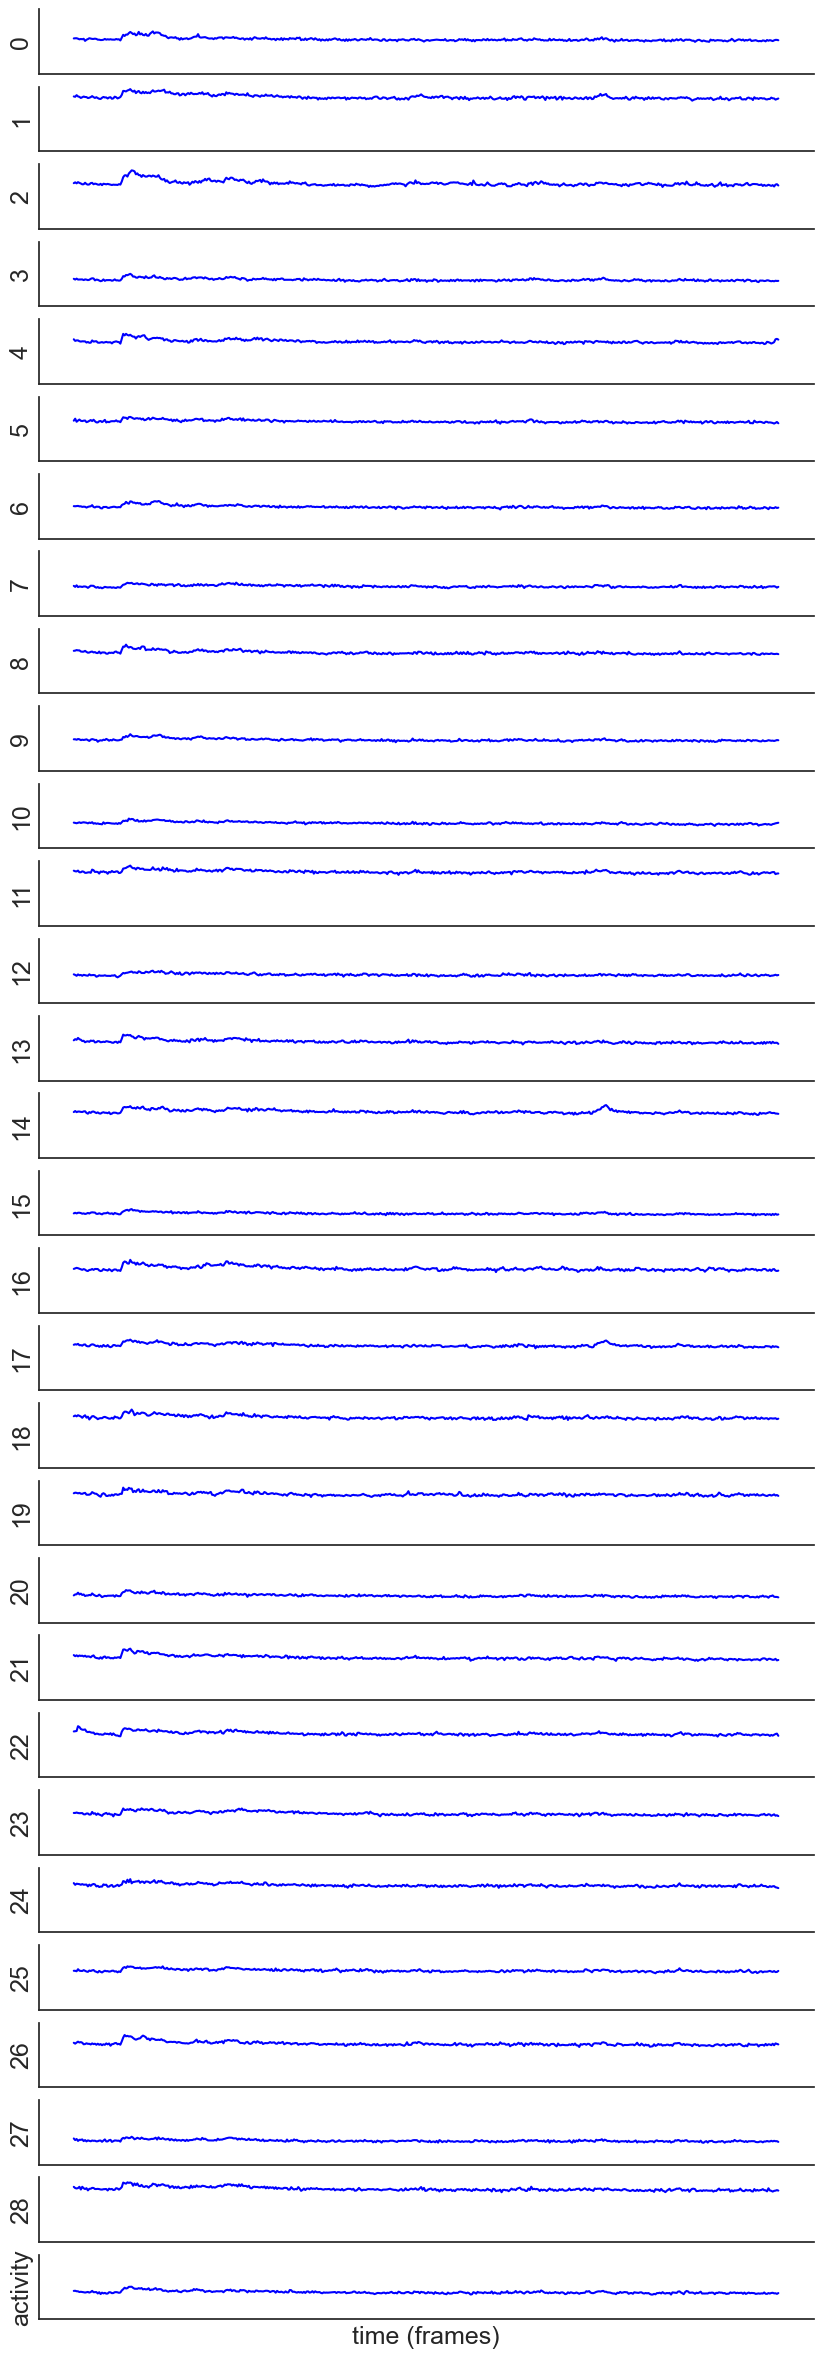

In [3]:
import random

N = 30                     # Number of random pixels
images_dim = images.shape  # dimensions of data (frames, x-pixels, y-pixels)
rnd_px = [random.sample(range(0, images_dim[1]), N),
          random.sample(range(1, images_dim[2]), N)]  # array of N random pixels

# plot temporal traces
figure, axes = plt.subplots(N,figsize=(10,N))
trace = np.zeros((N,images_dim[0]))    # initialise trace variable

for j in range(0,N):
    for i in range(0,images_dim[0]):
        trace[j][i] = images[i][rnd_px[0][j]][rnd_px[1][j]]   # write pixel values of the j-th random pixel to 'trace'
    axes[j].plot(range(0,images_dim[0]),trace[j],c='blue')    # plote trace of j-th random pixel
    axes[j].set_yticks([])
    axes[j].set_ylabel(j)
    axes[j].set_xticks([])
    axes[j].set_ylim([2**8, 2**9*1.5])
axes[N-1].set_xlabel('time (frames)')
sns.despine()
axes[N-1].set_ylabel('activity')



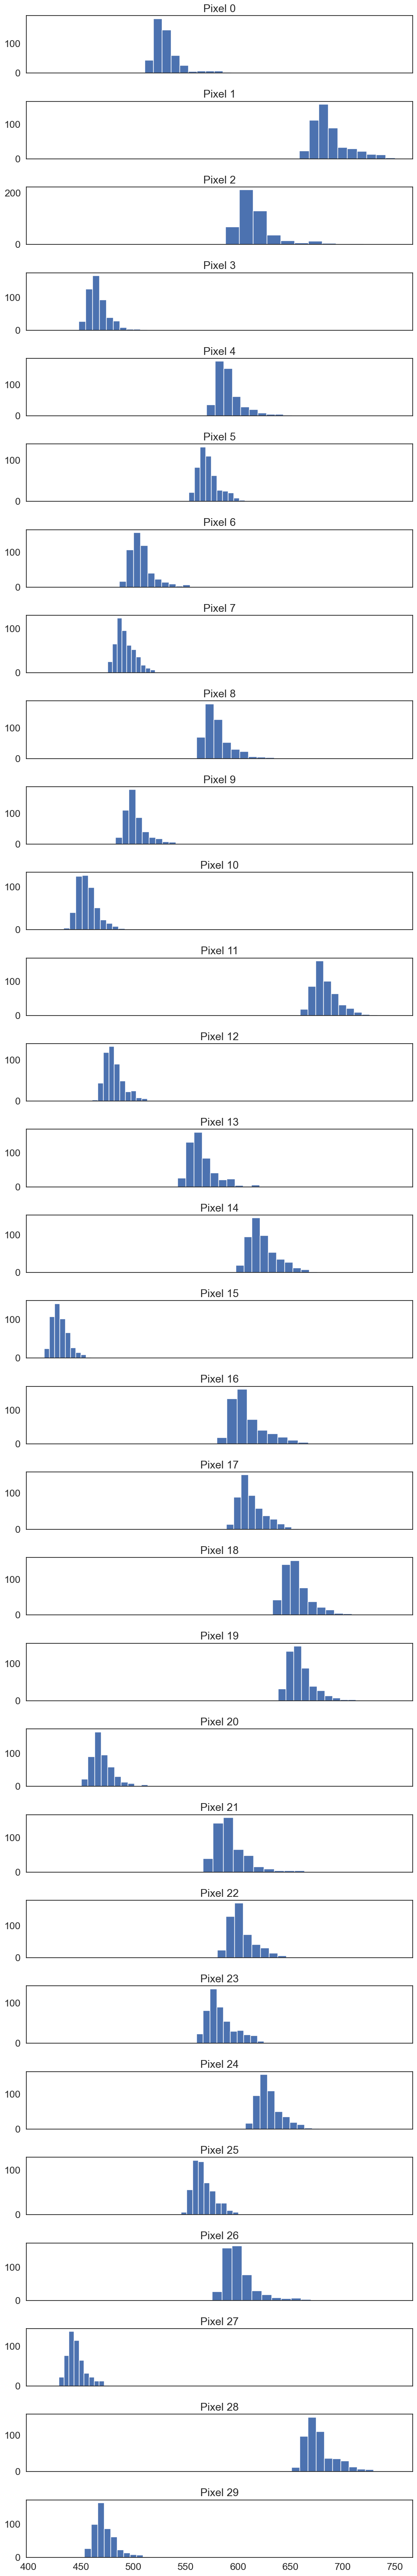

In [4]:
fig, axes = plt.subplots(N,sharex=True,figsize=(10,N*2))

# get the bin edges
#bins_=np.histogram(np.hstack((trace[0],trace[1],trace[2])), bins=40)[1] ### When using the bins some histograms would not be displayed correctly because of the choice of bins. That's why I didn't specify them although this makes it harde to compare the different histograms.

for j in range(0,N):
    axes[j].hist(trace[j])           # bins=bins_ did not work well
    axes[j].set_title('Pixel %i' % j)
    
fig.tight_layout()
plt.show()

### <font color=red>Comment</font>
*Spiking activity creates a range of different pixel values due to the sudden rise in pixel value and the relatively slow decay time of the spike signal to lower pixel values. The corresponding histogram therefore features a broad range of bars, typically with a peak around the background signal's pixel value and a decaying tail up to the highest pixel value of the spike. The width of this tail is the decisivie parameter to tell if the signal contains spiking activity and how strong that activity is.*

*The maximal value of the histogram can indicate activity, but parameters such as the background signal in that area and the strength of the activity impact the maximal value. Regions with no spiking activity show a high peak with smaller width because the pixel value does not change much over time. If the histograms have automatic bin sizes (as is the case in my solution), a broader bin size often indicates spiking activity.*

*If there is fluorescent bleaching present in the background signal, this can also broaden the peak in the histogram. However, since this typically takes place on longer timescales, it would probably still be possible to discriminate these from spikes. Still, a background correction before anaylsis is helpful.*

#### Why we should segment the data

*In the unsegmented data, we can't tell which spikes in different pixels are caused by the same neuron, which are correlated (e.g. in a cascade of signals), and which are not correlated. So the spikes we measure at a certain pixel could be caused by different neurons whose signals overlap at this pixel. The segmentation is crucial to assign the signals to certain neurons.*

*We would also not be able to tell how many neurons are actually firing because we don't know which pixels belong to the same neuron. For analysing the data it is important to know HOW MANY neurons are firing WHERE, WHEN, HOW LONG, and with WHAT INTENSITY.*

#### (Improvements to data representation in my solution)

*It would be beneficial to subtract the background from the histograms, use the same bin size, and move the graphs on the x-axis so thatthere peaks conincide. Then it would be easier to compare them. However, I had problems implementing this. I hope it is still clear what I was trying to show. The same accounts for the trace signals.*

## Exercise 2: motion correction parameters
---

One parameter that impacts motion correction performance is the size of the spatial filter that is applyed to the video.

* Use the following function from CaImAn and plot the result of different space filtering applyed to a single frame of the video:from caiman.motion_correction import high_pass_filter_space

* How will this filtering affect the measure of crispness?

* Acording to Pnevmatikakis et al, which other factors are relevant for pw-rigid motion correction?

- Explore the impact of different parameters in the output of motion correction algorithm by measuring crispness in the correlation image of the final outcome. Particularly measure the effect of different spatial filter size by applying motion correction algorithm multiple times and computing the crispness of the output video. 

- Display all crispness values for rigid and not rigid motion correction and plot them agains gSig_filters values.

- If possible, show the impact of the crispness value that comes from changing other relevant paraments.

*Note1: The is no need to save all the motion corrected movies, just save the cripsness values.*

*Note2: gSig_filters is an optional range of posible values, but if your computer gets to slow in the computation reduce the range.*


## Exercise 3: Source extraction parameters 
---

* For a fixed minimum correlation value (ie 0.6) select a range of possible PNR minimun values and study the impact of those in the final source extraction output.

* For a fixed value of PNR (ie 6) select a range of minimum correlation valur and study the impact of those in the final source extraction output.

* How do these paramenters affect the spatial sparcity of the output? Which set of parameter selection procedes the higher number of neurons? Is maximal number of neurons always better? Why?  

* Generate a plot of number of neurons vs PNR (or min corr value) to show how these parameters affect the source extracted signals.

* Are the temporal traces affected by these parameters?

* For different PNR and minimum correlation value plot the correlation image and the selected cells.